In [1]:
import numpy as np
import os
import sys
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

### Regresja Logistyczna (Logistic Regression)

### Regresja Logistyczna (Logistic Regression) - wprowadzenie

Pomimo nazwy jest to liniowy model do zadań **klasyfikacyjnych**.

#### Przykłady zastosowań:
- przewidywanie czy mail jest spamem, czy też nie
- przewidywanie czy użytkownik kliknie w reklamę
- przewidywanie czy nowotwór jest złośliwy czy też nie
- przewidywanie czy dłużnik spłaci wierzycielowi dług, czy też zajdzie zdarzenie default
- przewidywanie czy transakcja jest próbą oszustwa

Przy budowie modelu regresji logistycznej wykorzystamy funkcję sigmoid. Definiuje się ją wzorem:
$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

W odróżnieniu od regresji liniowej, która prognozuje wartość ciągłą, regresja logistyczna jest używana do przewidywania zmiennej binarnej, co oznacza, że wynik może przyjmować jedną z dwóch wartości (np. tak/nie, 1/0, pozytywny/negatywny).

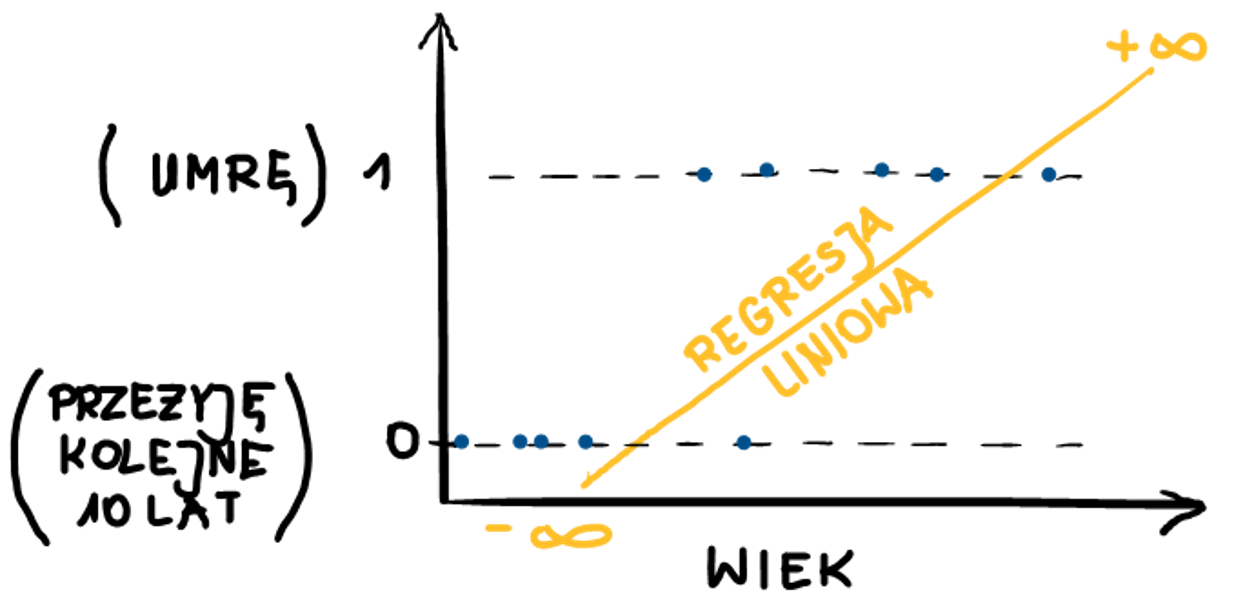

W tym przypadku widzimy, że wyniki dla takiej regresji liniowej rosną do +/- nieskończoności. A tak naprawdę zależy nam, aby dążyły do wartości od 0 do 1. Zatem potrzebujemy funkcji, która nam to zapewni.

Funkcja logistyczna (zwana również sigmoidalną) to funkcja matematyczna, która przekształca dowolną wartość wejściową do wartości z przedziału (0, 1). Jest często wykorzystywana w różnych dziedzinach matematyki i jest wyrażana wzorem:

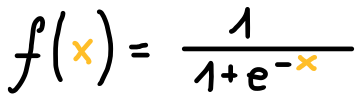

gdzie:
- $ x $ jest wartością zmiennej niezależnej,
- $ e $ jest liczbą Eulera (około 2,71828),
- $ f(x) $ jest wartością zmiennej zależnej.


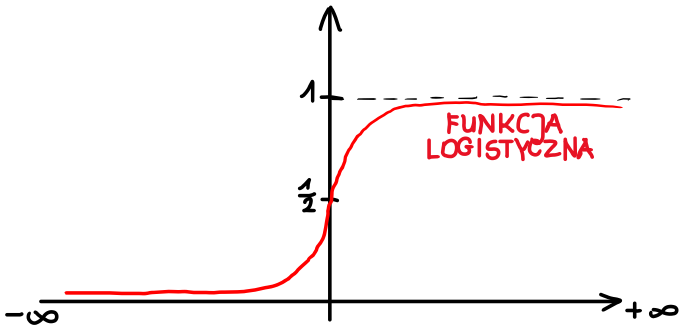

W kontekście uczenia maszynowego funkcję logistyczną wykorzystujemy często jako jedną z funkcji aktywacji lub w regresji logistycznej do przewidywania prawdopodobieństwa, czy dany obiekt należy do jednej z dwóch klas (np. „tak” lub „nie”, „0” lub „1”).

Model regresji logistycznej przyjmuje równanie liniowe jako dane wejściowe i wykorzystuje funkcję logistyczną do wykonania zadania klasyfikacji binarnej.

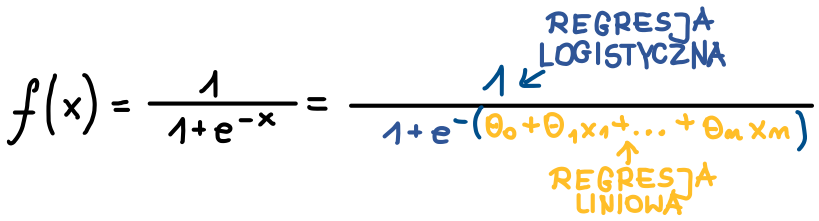

Wizualnie wygląda to tak:

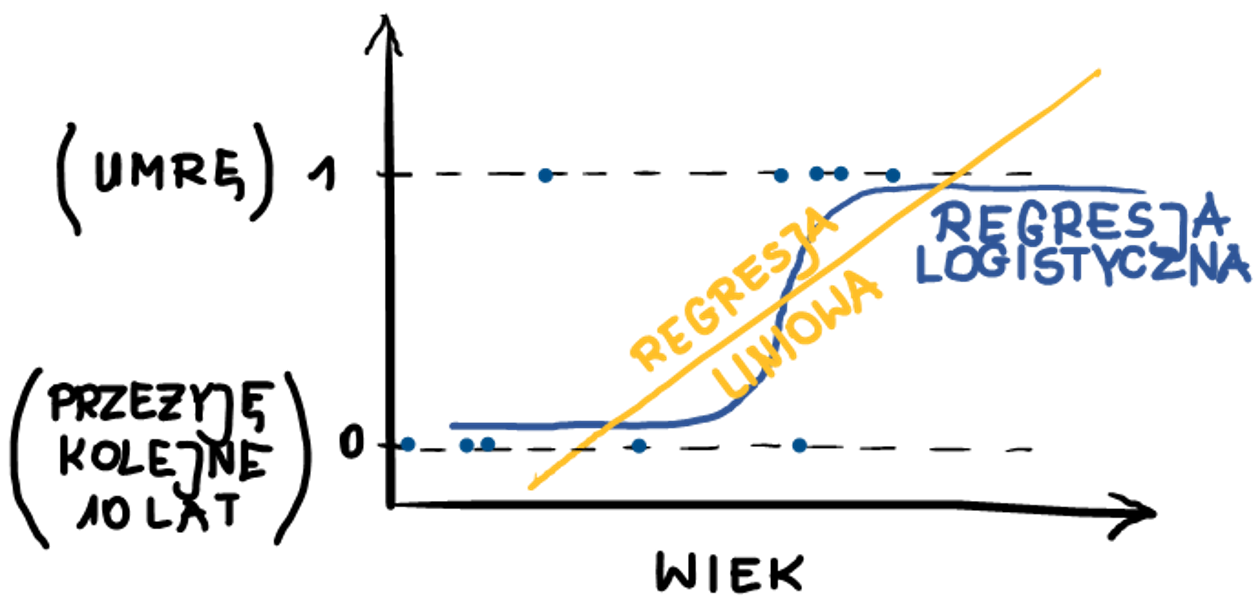

Powyższa krzywa w kształcie litery “S” pozwala nam odczytać, jakie jest prawdopodobieństwo tego, czy umrzemy w ciągu 10 najbliższych lat z założeniem konkretnego wieku.

Jeśli podamy bardzo wysoki wiek, to prawdopodobieństwo tego, że umrzemy w tym czasie jest bardzo wysokie. A dla młodego wieku jest odpowiednio niższe.

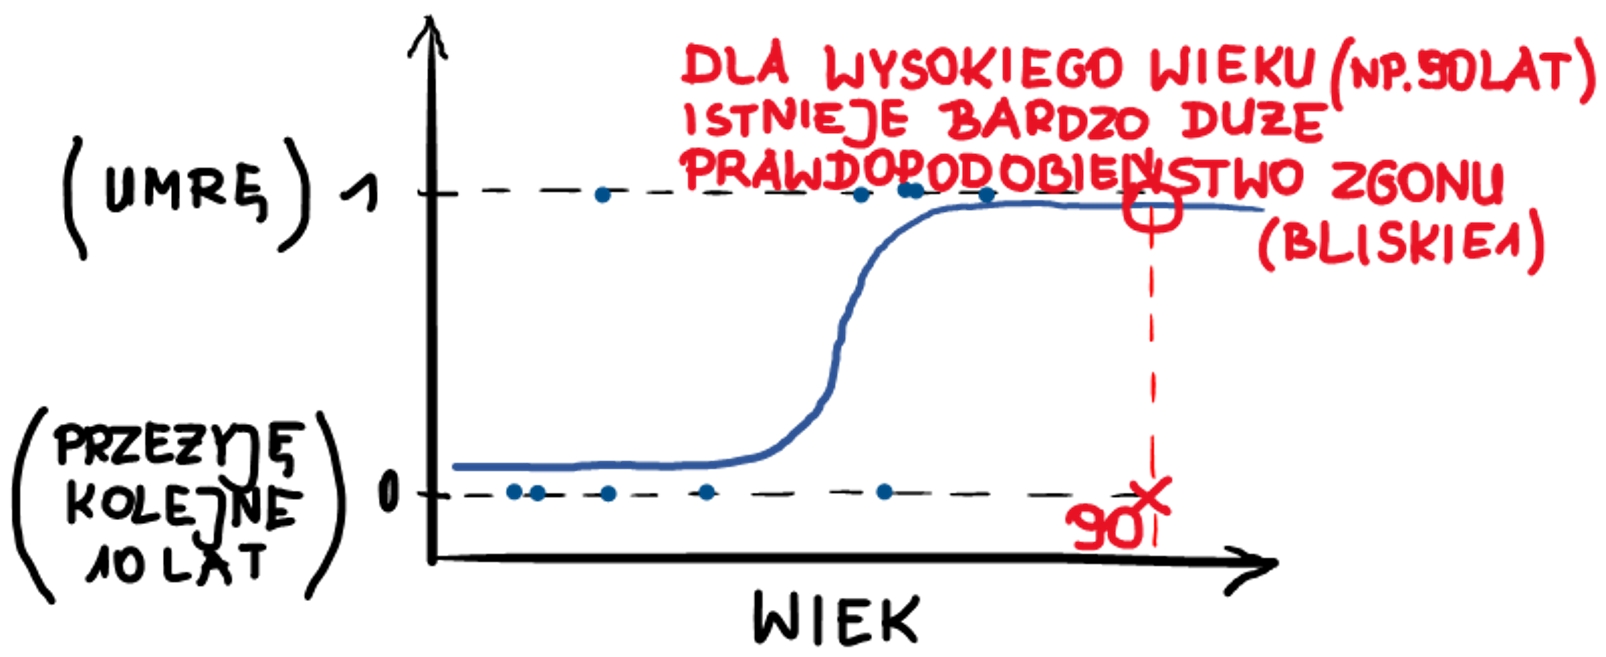

Zatem nasz model regresji logistycznej przewidującej prawdopodobieństwo śmierci w ciągu kolejnych 10 lat na podstawie wieku wygląda tak:

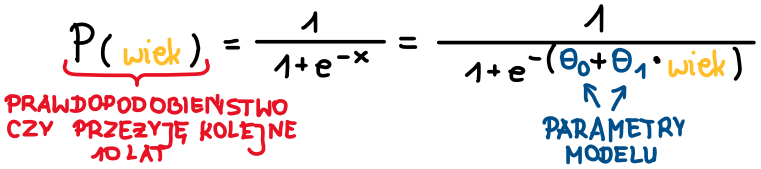

Oczywiście, aby model działał lepiej, należy dostarczyć większą liczbę cech niosących za sobą informacje do predykcji zmiennej.

Możemy dodać do naszego zbioru dodatkowe zmienne na przykład “czy_pali” (domyślnie papierosy) i wówczas wzór zostałby rozbudowany do poniższej postaci:

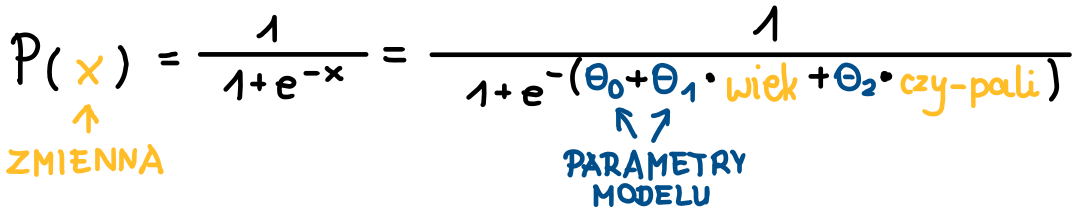

### Próg odcięcia (ang. treshold)

Jak widać regresja logistyczna zwraca nam prawdopodobieństwo występowania pewnego zdarzenia. Ale my mieliśmy do zaadresowania problem klasyfikacji, czyli czy dana osoba przeżyje kolejne 10 lat czy nie. Pomaga nam w tym próg odcięcia.

**Progiem odcięcia (ang. threshold)** w modelu regresji logistycznej nazywamy wartość, powyżej której przypisujemy obserwację do jednej klasy, a poniżej której do drugiej klasy. Jest to punkt graniczny, który pozwala na dokonanie decyzji o przynależności danego obiektu do jednej z klas na podstawie wartości przewidywanego prawdopodobieństwa.

Domyślnie w większości implementacji regresji logistycznej próg odcięcia wynosi 0,5 (czyli 50%). Oznacza to, że wszystkie obserwacje, dla których przewidywane prawdopodobieństwo przynależności do jednej z klas jest większe niż 0,5, zostaną przypisane do tej klasy, a pozostałe do drugiej.

Warto pamiętać, że wybór wartości progu odcięcia zależy od konkretnego zastosowania i powinien być ustalany na podstawie biznesowych metryk. Zauważ też, że wybór progu odcięcia wpływa na jakość niektórych metryk (np. recall, accurancy, precision).

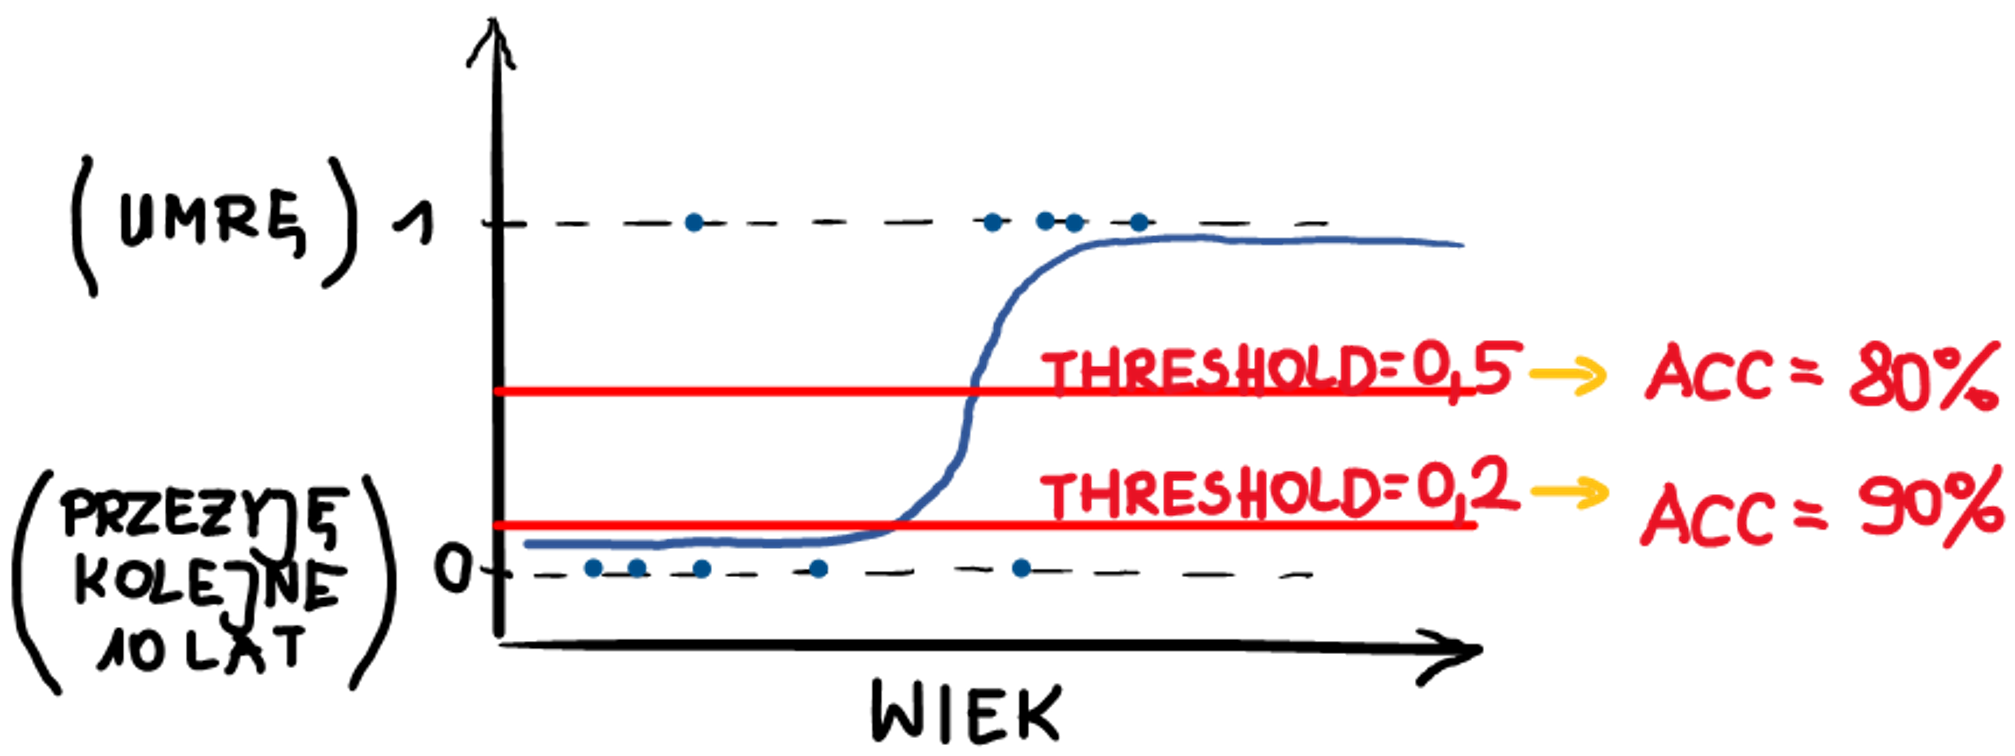

### Regresja logistyczna – jak optymalizujemy parametry?

W przypadku regresji liniowej mogliśmy posłużyć się na przykład metodą najmniejszych kwadratów, aby znaleźć optymalne parametry. A następnie wyliczyć współczynnik determinacji (R2) mówiący o jakości dopasowania modelu.

W przypadku regresji logistycznej nie możemy wykorzystać tych metod, ponieważ algorytm najmniejszych kwadratów jest techniką szacowania parametrów, która minimalizuje sumę kwadratów błędów między wartościami rzeczywistymi a wartościami przewidywanymi przez model. Regresja logistyczna z kolei jest modelem, który przewiduje prawdopodobieństwo przynależności do danej klasy.

Możemy natomiast wykorzystać **metodę największej wiarygodności (ang. maximum likelihood)**.

### Metoda największej wiarygodności

Algorytm **Maximum Likelihood (MLE)** to metoda, która pomaga nam znaleźć najlepsze wartości parametrów w modelach matematycznych, które opisują nasze dane.

Funkcja wiarygodności to funkcja opisująca prawdopodobieństwo obserwacji danych dla różnych wartości parametrów modelu. MLE szuka takich wartości parametrów, które maksymalizują tę funkcję wiarygodności, czyli takich, dla których obserwowane dane są najbardziej prawdopodobne.

MLE działa tak, że bada różne wartości parametrów i oblicza, jak prawdopodobne są nasze dane dla każdej z tych wartości.

Weźmy nasz wcześniejszy przykład z wiekiem i prawdopodobieństwem śmierci w ciągu najbliższych 10 lat i narysujmy pierwszą krzywą dla parametrów $ \beta_1 $ i $ \beta_2 $.

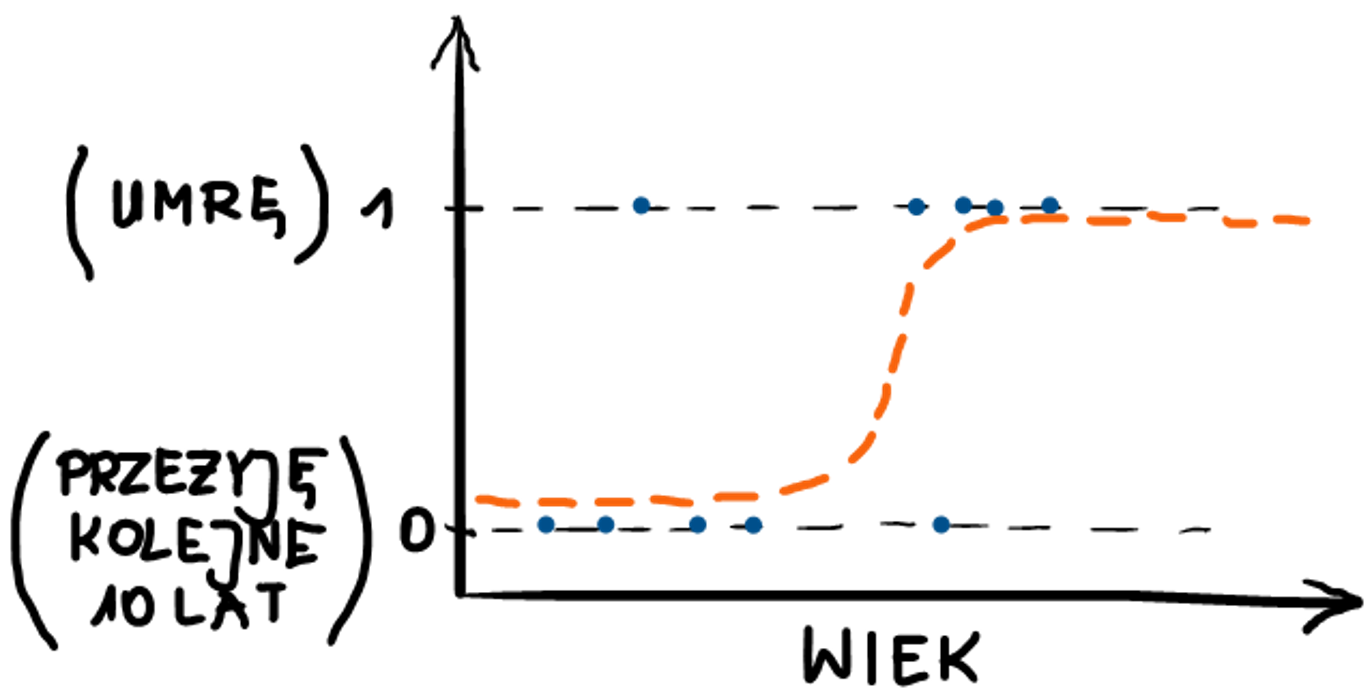

Następnie wyliczamy prawdopodobieństwa wystąpienia dla każdej obserwacji, mnożymy je i mamy wyliczoną wartość funkcji wiarygodności dla zadanej krzywej (czyli modelu z odpowiednimi parametrami).

Teraz przesuwamy odrobinkę krzywą dla innych parametrów i powtarzamy wyliczenie wartości funkcji wiarygodności dla niej. I tak w kółko.

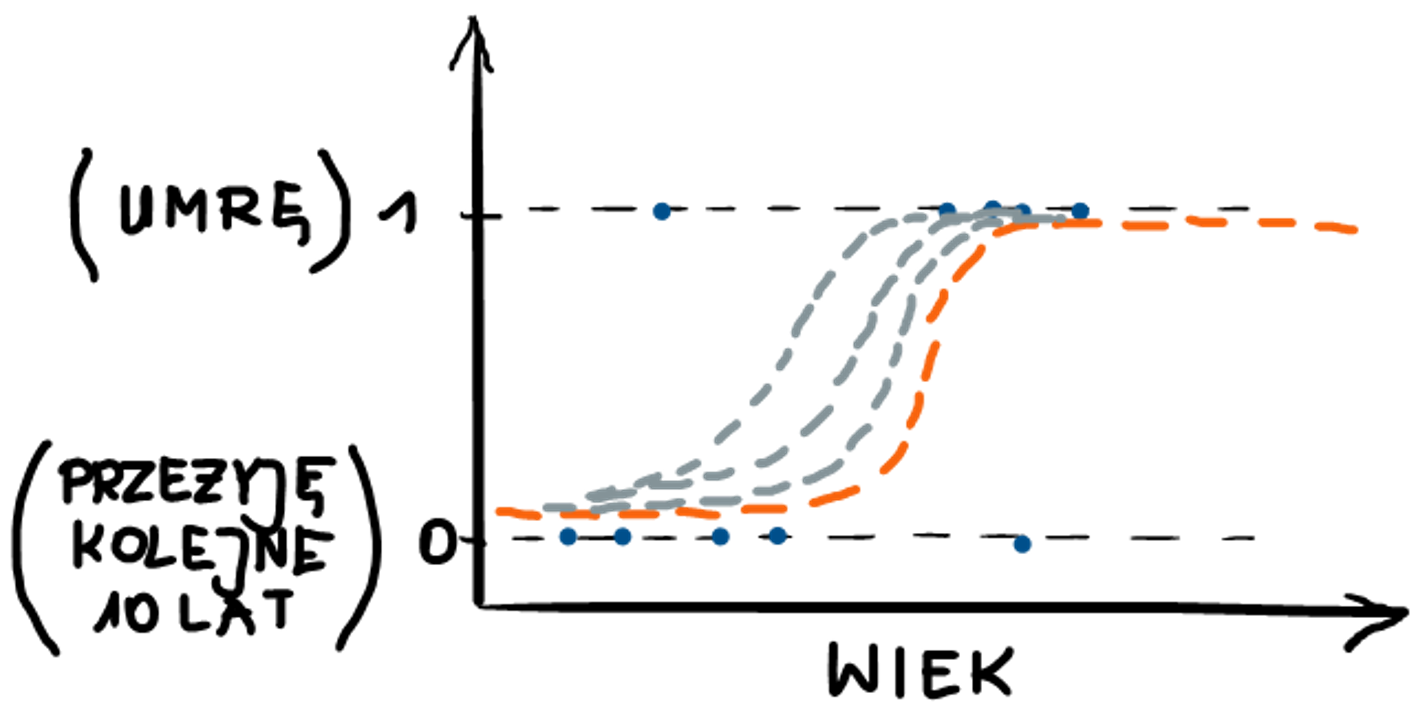

I ostatecznie wybieramy krzywą z największą wartością likelihood.

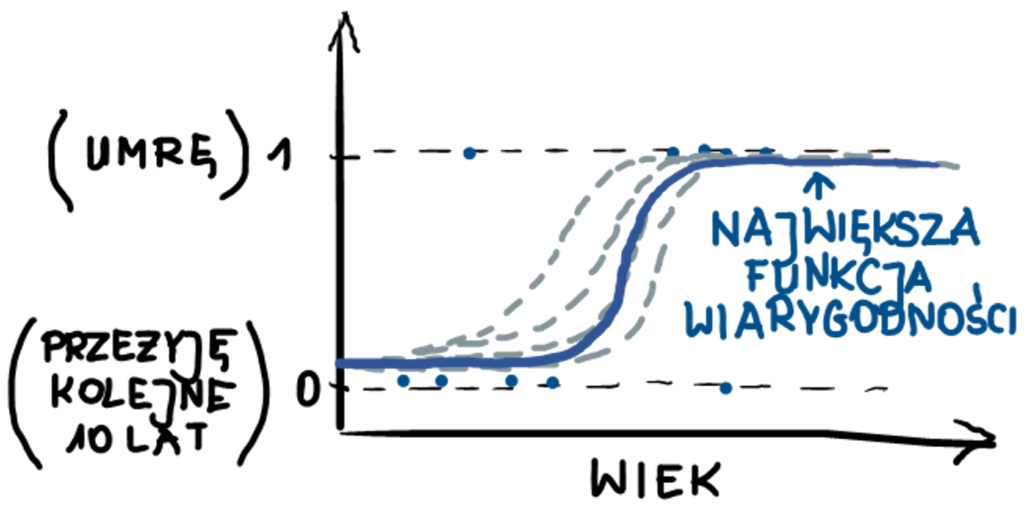

### Gradient i learning rate

Mówiąc powyżej, że przesuwamy odrobinkę krzywą, był to duży skrót myślowy, aby uprościć ideę działania algorytmu. Wchodząc bardziej w szczegóły, to w algorytmach najczęściej wyliczamy gradient funkcji wiarygodności.

Jest to wektor zawierający pochodne cząstkowe funkcji wiarygodności względem każdego z parametrów. Ten wektor pozwala na określenie kierunku, w którym funkcja ta rośnie najszybciej, a zatem w którym powinny być dokonywane zmiany wartości parametrów, aby osiągnąć maksimum funkcji.

Krok uczenia (ang. learning rate) to parametr algorytmu, który określa jak duże są zmiany wartości parametrów dokonywane w każdej iteracji. Jeśli krok uczenia jest zbyt mały, to algorytm może działać zbyt wolno lub zatrzymać się w minimum lokalnym. Natomiast, jeśli krok uczenia jest zbyt duży, to algorytm może nie osiągnąć maksimum funkcji, ponieważ zbyt szybko „przeskoczy” punkt, w którym funkcja ta osiąga maksimum.

Algorytm MLE używający gradientu i kroku uczenia optymalizuje funkcję wiarygodności poprzez iteracyjne aktualizowanie wartości parametrów w kierunku maksimum funkcji. Proces ten powtarzamy, aż wartość funkcji wiarygodności przestaje się poprawiać lub osiągniemy ustaloną iterację.

### Funkcja wiarygodności:

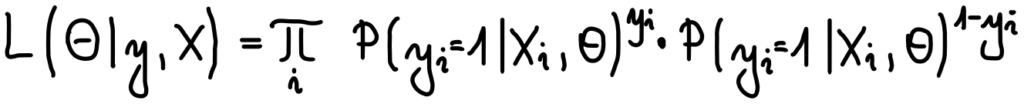

gdzie:
- θ to wektor wartości parametrów modelu,
- y to wektor wartości zmiennej objaśnianej przyjmującej wartość 0 lub 1,
- X to macierz zmiennych objaśniających,
- i to numer obserwacji,
- P(y_i=1 | X_i, θ) to prawdopodobieństwo, że dla i-tej obserwacji y przyjmuje wartość 1, przy założeniu wartości zmiennej niezależnej X_i oraz wartości parametrów regresji logistycznej.

Zatem liczymy powyższy iloczyn dla wszystkich obserwacji, które mamy i szukamy maksymalnej wartości dla różnych parametrów θ.

W przypadku naszego prostego przykładu z wiekiem doprecyzujmy, że prawdopodobieństwo możemy zapisać jako funkcję sigmoidalną, zdefiniowaną jako:

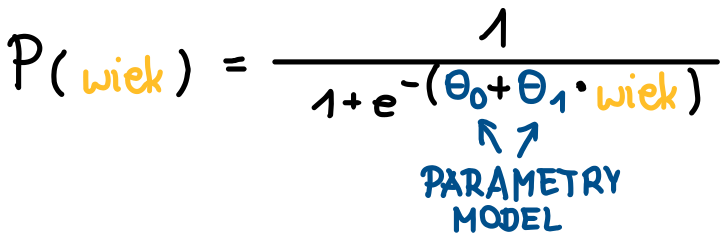

### Bardzo prosty kod w PYTHON

In [2]:
import pandas as pd
import math
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.DataFrame({'target': [0,1,0,0,0,0,0,0,1,1,1,1,0,1], 'age':[20,21,22,23,24,35,26,57,68,75,83,80,60,78], 'smoke': [0,0,0,0,0,0,0,0,1,0,1,1,1,0]})
df

,target,age,smoke
0,0,20,0
1,1,21,0
2,0,22,0
3,0,23,0
4,0,24,0
5,0,35,0
6,0,26,0
7,0,57,0
8,1,68,1
9,1,75,0


A teraz zbudujmy model na podstawie jednej zmiennej opisowej (age):

In [4]:
X = df[['age']]
y = df['target']
 
model = LogisticRegression()
model.fit(X, y)
 
# probability of death
age_to_predict = 30
model.predict_proba([[age_to_predict]])[:,1]


C:\Users\tomas\AppData\Local\Programs\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.14])

In [7]:
model.predict([[age_to_predict]])[0]

C:\Users\tomas\AppData\Local\Programs\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0

Pamiętacie powyższy wzór na prawdopodobieństwo z parametrami θ? Wyciągnijmy te zmienne z modelu i podstawmy pod wzór, by mieć pewność, że był poprawny.

In [8]:
theta0 = model.intercept_[0]
theta1 = model.coef_[0][0]
 
print(f'theta1={round(theta1,3)}; theta0 ={round(theta0,3)}')
 
# probability of death from math formula
round(1/(1+math.exp(-(age_to_predict*theta1+theta0))),8)

theta1=0.073; theta0 =-4.001


0.14109685

### statsmodels.api.Logit()

In [9]:
import statsmodels.api as sm
 
X = df[['age']]
y = df['target']
 
X = sm.add_constant(X)
 
model = sm.Logit(y,X)
 
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.419705
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                  0.3854
Time:                        13:54:22   Log-Likelihood:                -5.8759
converged:                       True   LL-Null:                       -9.5607
Covariance Type:            nonrobust   LLR p-value:                  0.006633
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0057      1.956     -2.048      0.041      -7.840      -0.172
age            0.0733      0.

W regresji logistycznej, współczynniki regresji (coef) odpowiadają za ilościową zmianę w **logarytmie szans** zmiennej objaśnianej (y), która jest wyjaśniana przez zmienne niezależne (X).

### Logarytm szans (ang. log odds)

Logarytm szans w regresji logistycznej, to logarytm ilorazu prawdopodobieństwa sukcesu do prawdopodobieństwa niepowodzenia, który jest wykorzystywany do modelowania prawdopodobieństwa sukcesu w zależności od zmiennych niezależnych.

W regresji logistycznej każde prawdopodobieństwo lub możliwy wynik zmiennej zależnej można przekształcić w logarytm szans, znajdując iloraz szans.

Uwaga! Szansa a prawdopodobieństwo to coś innego! Szansa to stosunek tego, co się dzieje, do tego, co się nie dzieje. A prawdopodobieństwo to stosunek tego, co się dzieje, do wszystkiego, co może się wydarzyć.

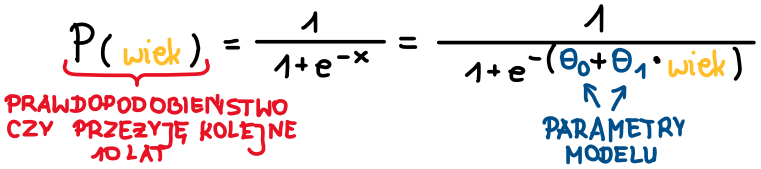

Współczynnik regresji dla wieku wynosi 0.0733. Zmienna coef dla zmiennej niezależnej oznacza, jak bardzo ta zmienna oddziałuje na zmienną objaśnianą w analizie regresji logistycznej. Im większa wartość współczynnika, tym większy wpływ na zmienną objaśnianą.

Wartości współczynnika możemy też wykorzystać do określenia kierunku wpływu zmiennej niezależnej na zmienną objaśnianą. Współczynnik dodatni oznacza, że zwiększenie zmiennej niezależnej prowadzi do zwiększenia wartości zmiennej objaśnianej, a współczynnik ujemny oznacza, że zwiększenie zmiennej niezależnej prowadzi do zmniejszenia przewidywanego prawdopodobieństwa.

Współczynniki regresji logistycznej można wykorzystać do oszacowania szansy (odds) sukcesu lub niepowodzenia w modelu, w zależności od wartości zmiennych niezależnych. Aby oszacować szansę (ang. odds) dla danej wartości zmiennej niezależnej, należy pomnożyć wartość zmiennej niezależnej przez współczynnik regresji i dodać stałą.

W naszym przypadku będzie to:

0.0715 * wiek - 3.6991

**szanse:**

In [54]:
0.0733 * 30 - 4.0057

-1.8066999999999998

In [55]:
0.0733 * 95 - 4.0057

2.9578000000000007

**prawdopodobieństwa:**

In [56]:
round(1/(1+math.exp(-(30*theta1+theta0))),8)

0.14109685

In [57]:
round(1/(1+math.exp(-(100*theta1+theta0))),8)

0.96495747

In [58]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                   14
Model:                          Logit   Df Residuals:                       12
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Aug 2024   Pseudo R-squ.:                  0.3854
Time:                        11:47:09   Log-Likelihood:                -5.8759
converged:                       True   LL-Null:                       -9.5607
Covariance Type:            nonrobust   LLR p-value:                  0.006633
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.0057      1.956     -2.048      0.041      -7.840      -0.172
age            0.0733      0.034      2.169      0.030       0.007       0.139


## Parametr 'std err' w podsumowaniu modelu Logit() z pakietu statsmodels

Parametr 'std err' w podsumowaniu modelu Logit() z pakietu statsmodels oznacza **błąd standardowy** (standard error) oszacowanych współczynników regresji logistycznej. Błąd standardowy jest miarą niepewności oszacowania danego parametru.

Interpretacja błędu standardowego:

- Im mniejszy błąd standardowy, tym oszacowanie danego parametru jest bardziej precyzyjne i mniej obarczone błędem.
- Błąd standardowy jest używany do obliczenia przedziałów ufności dla oszacowanych parametrów. Przedziały te pokazują zakres wartości, w którym z danym prawdopodobieństwem (np. 95%) znajduje się prawdziwa wartość parametru[1][2].
- Błąd standardowy jest również wykorzystywany do obliczenia statystyki testowej (wartości z lub t) służącej do sprawdzenia istotności statystycznej danego parametru[1][3].

Przykładowo, w podsumowaniu modelu Logit() możemy zobaczyć:

```
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 100
Model:                          Logit   Df Residuals:                      97
Method:                           MLE   Df Model:                           2
Date:                Fri, 16 Aug 2024   Pseudo R-squared:                0.201
Time:                        14:51:36   Log-Likelihood:                -53.919
converged:                       True   LL-Null:                       -67.669
                                        LLR p-value:                 1.435e-06
==============================================================================
                 coef    std err      z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6931      0.3780    1.833      0.067      -0.048       1.434
x1             0.0373      0.0108    3.448      0.001       0.016       0.058
x2            -0.0269      0.0122   -2.205      0.027      -0.051      -0.003
==============================================================================
```

W powyższym przykładzie błąd standardowy dla parametru `x1` wynosi 0.0108, a dla `x2` - 0.0122. Oznacza to, że oszacowanie parametru `x1` jest nieco bardziej precyzyjne niż `x2`.

## Interpretacja parametru 'z' w wynikach regresji logistycznej

Parametr 'z' w wynikach modelu regresji logistycznej (Logit) reprezentuje **statystykę testową** dla danego współczynnika regresji. Jest to wartość obliczona jako stosunek oszacowanego współczynnika do jego błędu standardowego:

$$ z = \frac{\text{coef}}{\text{std err}} $$

### Interpretacja wartości 'z':

1. **Wartości 'z'**:
   - Wartości 'z' wskazują, jak wiele standardowych odchyleń (błędów standardowych) dany współczynnik znajduje się od zera.
   - Wysoka wartość bezwzględna statystyki 'z' sugeruje, że współczynnik jest istotny statystycznie, co oznacza, że istnieje silny dowód na to, że dany zmienny ma wpływ na zmienną zależną.

2. **Przykład z wyników**:
   - Dla zmiennej `x1`, wartość 'z' wynosi 3.448.
   - Dla zmiennej `x2`, wartość 'z' wynosi -2.205.

### Co oznaczają te wartości?

- **Dla `x1` (z = 3.448)**:
  - Wartość 'z' jest dodatnia i znacznie większa od 0, co sugeruje, że zmienna `x1` ma pozytywny wpływ na zmienną zależną (y) i jest istotna statystycznie. 
  - Wartość ta sugeruje, że zmiana `x1` o jednostkę prowadzi do wzrostu logitów (logarytmu szans) o około 0.0373, co jest potwierdzone przez wysoką wartość 'z'.

- **Dla `x2` (z = -2.205)**:
  - Wartość 'z' jest ujemna, co sugeruje, że zmienna `x2` ma negatywny wpływ na zmienną zależną (y) i również jest istotna statystycznie.
  - Ujemna wartość wskazuje, że wzrost `x2` o jednostkę prowadzi do spadku logitów o około 0.0269.

### Wnioski:

- Wartości 'z' są używane do oceny istotności statystycznej współczynników. Zazwyczaj przyjmuje się, że wartość 'z' powyżej 1.96 lub poniżej -1.96 (przy poziomie istotności 0.05) sugeruje, że współczynnik jest istotny statystycznie.
- W przypadku obu zmiennych (`x1` i `x2`), ich wartości 'z' sugerują, że są one istotne statystycznie i mają wpływ na zmienną zależną.

## Interpretacja parametru 'P>|z|' w wynikach regresji logistycznej

Parametr 'P>|z|' w wynikach modelu regresji logistycznej wskazuje na **p-wartość** dla testu hipotezy, że dany współczynnik regresji jest równy zeru. P-wartość jest kluczowym wskaźnikiem używanym do oceny istotności statystycznej współczynników w modelu.

### Co oznacza p-wartość?

1. **Definicja**:
   - P-wartość określa prawdopodobieństwo uzyskania statystyki testowej (w tym przypadku 'z') tak ekstremalnej lub bardziej ekstremalnej, zakładając, że hipoteza zerowa (współczynnik równy zeru) jest prawdziwa.

2. **Interpretacja**:
   - Niska p-wartość (zwykle poniżej 0.05) sugeruje, że istnieje silny dowód na odrzucenie hipotezy zerowej, co oznacza, że dany współczynnik jest istotny statystycznie.
   - Wysoka p-wartość (powyżej 0.05) sugeruje, że nie ma wystarczających dowodów, aby odrzucić hipotezę zerową, co oznacza, że dany współczynnik nie jest istotny statystycznie.

### Przykład z wyników:

Dla współczynników `x1` i `x2`, p-wartości mogą wyglądać następująco:

- **Dla `x1`**: P>|z| = 0.001
- **Dla `x2`**: P>|z| = 0.027

### Co to oznacza?

- **Dla `x1` (P>|z| = 0.001)**:
  - P-wartość jest znacznie mniejsza niż 0.05, co sugeruje, że współczynnik `x1` jest istotny statystycznie. Oznacza to, że zmiana w `x1` ma znaczący wpływ na prawdopodobieństwo wystąpienia zdarzenia opisanego przez zmienną zależną.

- **Dla `x2` (P>|z| = 0.027)**:
  - P-wartość również jest mniejsza niż 0.05, co wskazuje, że współczynnik `x2` jest również istotny statystycznie. To sugeruje, że zmiana w `x2` również ma znaczący wpływ na prawdopodobieństwo wystąpienia zdarzenia.

### Wnioski:

Parametr 'P>|z|' jest kluczowym elementem analizy wyników regresji logistycznej, ponieważ pozwala na ocenę, które zmienne mają istotny wpływ na model. W przypadku obu zmiennych w podanym przykładzie, ich niskie p-wartości wskazują na ich istotność statystyczną, co sugeruje, że są one ważnymi predyktorami zmiennej zależnej.

Citations:
[1] https://miroslawmamczur.pl/jak-dziala-regresja-logistyczna/
[2] https://predictivesolutions.pl/regresja-logistyczna
[3] https://pl.wikipedia.org/wiki/Regresja_logistyczna
[4] https://www.youtube.com/watch?v=tRBYb8E_dEg
[5] https://bibliotekanauki.pl/articles/1830759.pdf

## Interpretacja przedziałów ufności [0.025 0.975] w wynikach regresji logistycznej

Parametry '[0.025 0.975]' w podsumowaniu modelu regresji logistycznej (Logit) reprezentują **95% przedziały ufności** dla oszacowanych współczynników regresji. Przedziały te określają zakres wartości, w którym z 95% prawdopodobieństwem znajduje się prawdziwa wartość parametru.

### Interpretacja przedziałów ufności:

1. **Definicja**:
   - Przedział ufności to zakres wartości, który z określonym prawdopodobieństwem (tutaj 95%) zawiera prawdziwą, nieznaną wartość parametru.

2. **Interpretacja**:
   - Jeśli przedział ufności nie zawiera zera, oznacza to, że dany współczynnik jest istotny statystycznie na poziomie istotności 0.05.
   - Im węższy przedział ufności, tym oszacowanie parametru jest bardziej precyzyjne.

### Przykład z wyników:

Dla współczynników `x1` i `x2`, przedziały ufności wyglądają następująco:

- **Dla `x1`**: [0.016 0.058]
- **Dla `x2`**: [-0.051 -0.003]

### Co to oznacza?

- **Dla `x1` ([0.016 0.058])**:
  - Przedział ufności dla `x1` nie zawiera zera, co sugeruje, że współczynnik jest istotny statystycznie na poziomie 0.05.
  - Możemy stwierdzić z 95% pewnością, że prawdziwa wartość parametru `x1` znajduje się w przedziale od 0.016 do 0.058.

- **Dla `x2` ([-0.051 -0.003])**:
  - Przedział ufności dla `x2` również nie zawiera zera, co wskazuje na istotność statystyczną tego współczynnika na poziomie 0.05.
  - Możemy stwierdzić z 95% pewnością, że prawdziwa wartość parametru `x2` znajduje się w przedziale od -0.051 do -0.003.

### Wnioski:

Przedziały ufności dostarczają dodatkowych informacji na temat precyzji oszacowań parametrów. Fakt, że oba przedziały ufności nie zawierają zera, potwierdza wnioski wyciągnięte na podstawie p-wartości - zmienne `x1` i `x2` są istotnymi predyktorami w modelu regresji logistycznej. Ponadto, węższe przedziały ufności sugerują, że oszacowanie parametru `x1` jest nieco bardziej precyzyjne niż `x2`.

### Podsumowując:

Z-test ocenia hipotezę zerową, że dany współczynnik jest równy zeru.

Wysoka wartość bezwzględna statystyki z oraz niska p-wartość (zwykle poniżej 0.05) sugerują, że współczynnik jest istotny statystycznie.

### Kluczowe założenia regresji logistycznej

1. **Binarna zmienna zależna**:
   - Zmienna, którą chcemy modelować, musi być dychotomiczna, co oznacza, że przyjmuje tylko dwie wartości (np. 0/1, tak/nie).

2. **Liniowość w odniesieniu do logitów**:
   - Zakłada się, że istnieje liniowa zależność pomiędzy logitem prawdopodobieństwa a zmiennymi niezależnymi. Oznacza to, że logarytm szansy (logit) powinien być liniowo zależny od zmiennych objaśniających.

3. **Brak silnej korelacji między zmiennymi niezależnymi**:
   - Należy unikać współliniowości, czyli sytuacji, w której zmienne niezależne są ze sobą zbyt silnie skorelowane. Silna korelacja może prowadzić do niestabilnych oszacowań współczynników.

4. **Rozmiar próby**:
   - Regresja logistyczna daje wiarygodne i stabilne wyniki, gdy bierze się pod uwagę większy rozmiar próby zbioru danych.
   - Zwykle zaleca się, aby liczba przypadków (zarówno pozytywnych jak i negatywnych) w próbie była co najmniej dziesięciokrotnie większa niż liczba zmiennych objaśniających. Zatem przy budowie modelu z 10 zmiennymi oznaczałoby, że powinno być co najmniej po 100 przypadków dla każdej klasy.
   - Jednakże, zalecana minimalna liczba przypadków może być różna w zależności od kontekstu badawczego oraz stopnia złożoności modelu oraz rodzajów zmiennych.
   
5. **Wartości odstające**:
   - Kolejnym krytycznym założeniem dla regresji logistycznej jest konieczność pozbycia się wartości odstających w zbiorze danych, ponieważ mocno będą zaburzać dobierane parametry modelu θ.

6. **Niezależność obserwacji**:
   - Obserwacje w zbiorze danych powinny być niezależne od siebie. To oznacza, że wynik jednej obserwacji nie powinien wpływać na wynik innej.

7. **Odpowiednie zakodowanie zmiennych**:
   - Zmienne kategoryczne powinny być odpowiednio zakodowane (np. za pomocą kodowania zero-jedynkowego), aby mogły być użyte w modelu.

8. **Poprawne dopasowanie modelu**:
   - Model powinien być właściwie dopasowany, co oznacza, że powinny być w nim uwzględnione tylko istotne zmienne, a także unikać nadmiernego dopasowania (overfitting) lub niedopasowania (underfitting).

## Przewidywanie kategorii

Regresja logistyczna modeluje prawdopodobieństwo przynależności do jednej z dwóch kategorii*. Wykorzystuje funkcję logistyczną (sigmoidalną), aby przekształcić liniową kombinację cech wejściowych w wartość prawdopodobieństwa, która mieści się w przedziale od 0 do 1. 

*Gdy liczba kategorii w problemie klasyfikacyjnym wynosi więcej niż 2, stosuje się rozszerzenie regresji logistycznej, znane jako wielomianowa regresja logistyczna (multinomial logistic regression)

### Równanie regresji logistycznej

Model regresji logistycznej można zapisać w postaci:

$$ P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} $$

gdzie:
- $ P(Y=1|X) $ to prawdopodobieństwo, że zmienna zależna Y przyjmuje wartość 1, biorąc pod uwagę cechy X,
- $ \beta_0 $ to wyraz wolny,
- $ \beta_1, \beta_2, ..., \beta_n $ to współczynniki regresji dla cech $ X_1, X_2, ..., X_n $.

## Różnica pomiędzy klasyfikacją a regresją

### Klasyfikacja

Klasyfikacja to proces przypisywania etykiet do danych na podstawie ich cech. W przypadku regresji logistycznej celem jest przypisanie danych do jednej z dwóch klas. Klasyfikacja może być binarna (dwie klasy) lub wieloklasowa (więcej niż dwie klasy).

### Regresja

Regresja, z drugiej strony, odnosi się do przewidywania wartości ciągłej na podstawie zmiennych niezależnych. Przykładem regresji może być przewidywanie ceny domu na podstawie jego powierzchni, liczby pokoi, lokalizacji itp.

### Kluczowe różnice

- **Cel**: Klasyfikacja przewiduje kategorie, regresja przewiduje wartości ciągłe.
- **Typ wyniku**: Klasyfikacja daje wynik w postaci etykiet, regresja w postaci liczb.
- **Metodyka**: Techniki używane do klasyfikacji (np. drzewa decyzyjne, SVM) różnią się od metod regresyjnych (np. regresja liniowa).

## Walidacja predykcji

Walidacja predykcji jest kluczowym krokiem w procesie uczenia maszynowego, który pozwala ocenić, jak dobrze model generalizuje na nowych, niewidzianych danych. Istnieje kilka popularnych metod walidacji:

### Podział danych

Najczęściej stosowaną metodą jest podział danych na zestaw treningowy i testowy. Model jest trenowany na zestawie treningowym, a następnie testowany na zestawie testowym, aby ocenić jego wydajność.

### Walidacja krzyżowa

Walidacja krzyżowa, w szczególności k-krotna walidacja krzyżowa, polega na podziale danych na k podzbiorów. Model jest trenowany k razy, za każdym razem używając innego podzbioru jako zestawu testowego, a pozostałych jako zestawu treningowego. Średnia wydajność na wszystkich podzbiorach daje bardziej wiarygodny obraz skuteczności modelu.

### Metryki oceny

Do oceny wydajności modelu regresji logistycznej najczęściej wykorzystuje się metryki takie jak:
- **Dokładność (Accuracy)**: Proporcja poprawnych prognoz do całkowitej liczby prognoz.
- **Precyzja (Precision)**: Proporcja prawdziwych pozytywów do wszystkich pozytywnych prognoz.
- **Czułość (Recall)**: Proporcja prawdziwych pozytywów do wszystkich rzeczywistych pozytywów.
- **Krzywa ROC i AUC**: Narzędzia do oceny jakości klasyfikacji w kontekście różnych progów decyzyjnych.

## Interpretacja ważności parametrów

W regresji logistycznej współczynniki (parametry) modelu mają istotne znaczenie dla interpretacji wpływu poszczególnych cech na wynik. 

### Współczynniki regresji

Każdy współczynnik $ \beta_i $ wskazuje, jak zmiana w danej cesze $ X_i $ wpływa na logarytm stosunku szans (log-odds) przynależności do klasy 1. Wartości współczynników mogą być interpretowane w następujący sposób:

- **Dodatni współczynnik**: Wzrost wartości cechy prowadzi do zwiększenia prawdopodobieństwa przynależności do klasy 1.
- **Ujemny współczynnik**: Wzrost wartości cechy prowadzi do zmniejszenia prawdopodobieństwa przynależności do klasy 1.

### Ekspozycja współczynników

Aby lepiej zrozumieć wpływ cech, można obliczyć ilorazy szans (odds ratios) poprzez exponentację współczynników:

$$ \text{Odds Ratio} = e^{\beta_i} $$

Wartości te mówią, o ile razy zwiększa się (lub zmniejsza) prawdopodobieństwo przynależności do klasy 1 przy jednostkowej zmianie cechy $ X_i $.



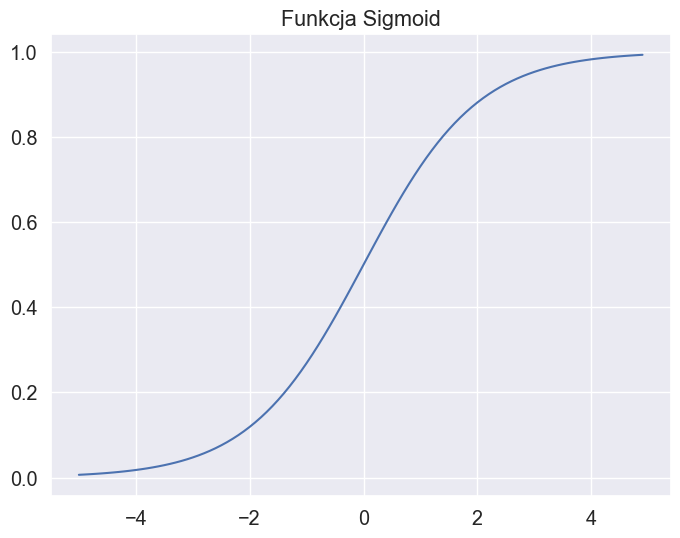

In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)

plt.figure(figsize=(8, 6))
plt.plot(X, y)
plt.title('Funkcja Sigmoid');

Następnie rozważmy funkcję liniową $y = w_0 + w_1x$. Podstawiając to do funkcji sigmoid otrzymujemy:
$$p(x) = \frac{1}{1 + e^{-(w_0 + w_1x)}}$$
Dzięki temu przekształceniu regresja logistyczna zwraca nam wartości z przedziału $(0, 1)$ co możemy interpretować jako prawdopodobieństwo i na podstawie tych prawdopodobieństw przewidywać poszczególne klasy.

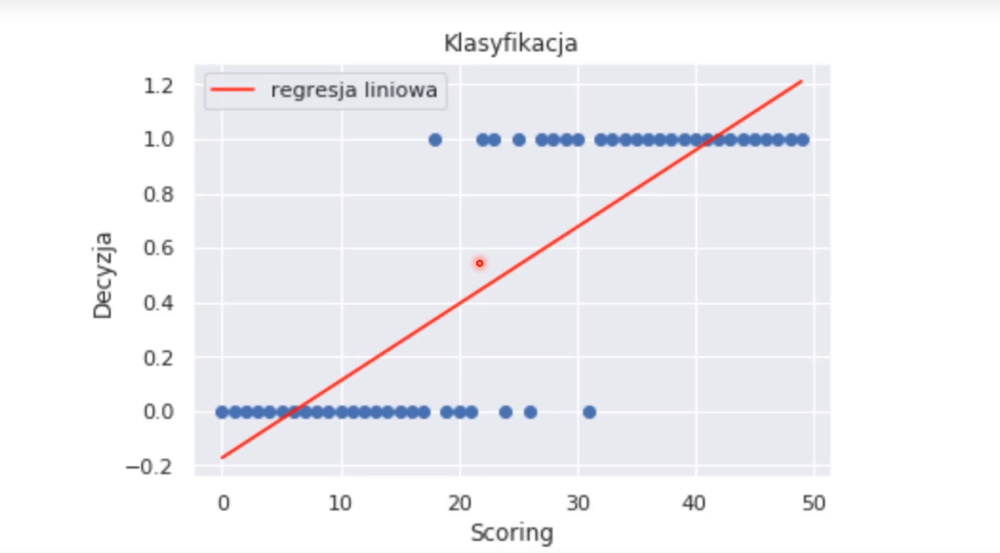

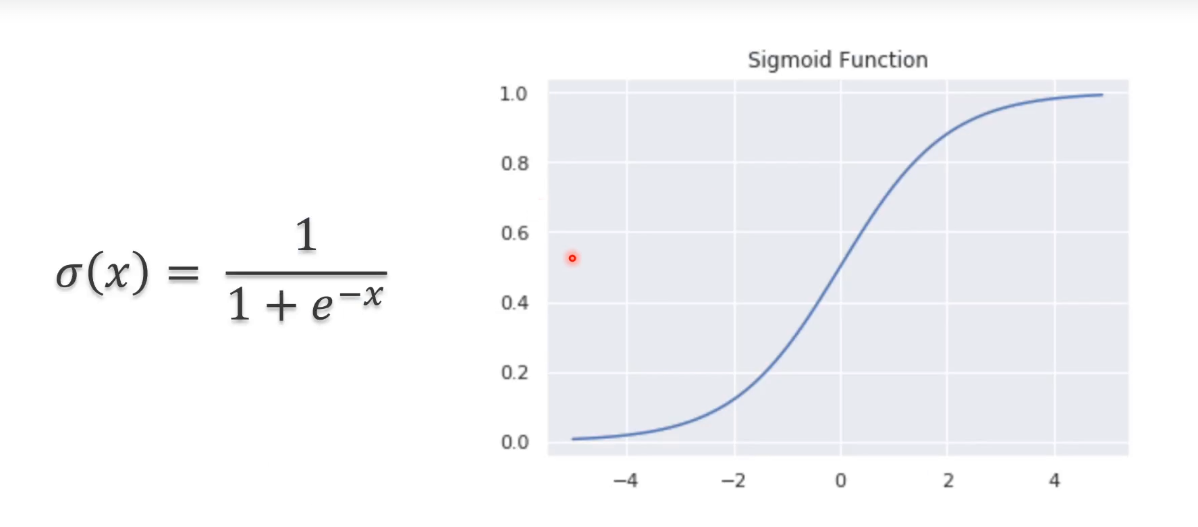

wynik funkcji (to co zwraca) jest z przedziału 0-1 i możemy utożsamiać to wprost z prawdopodobieństwem

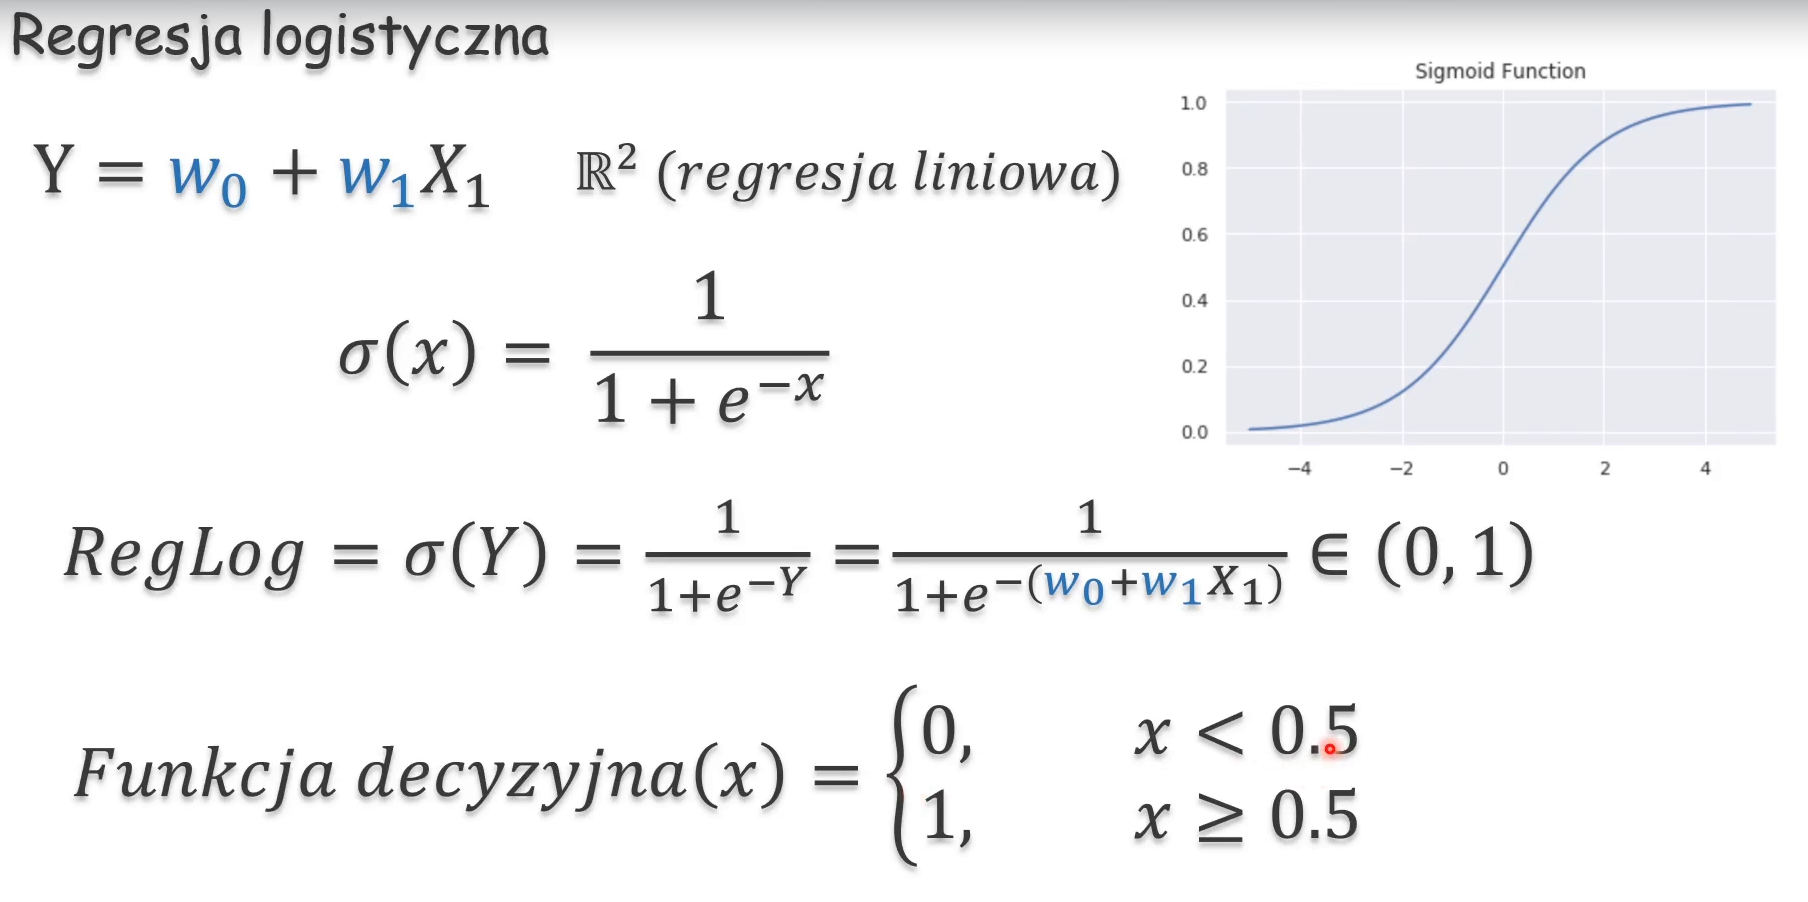

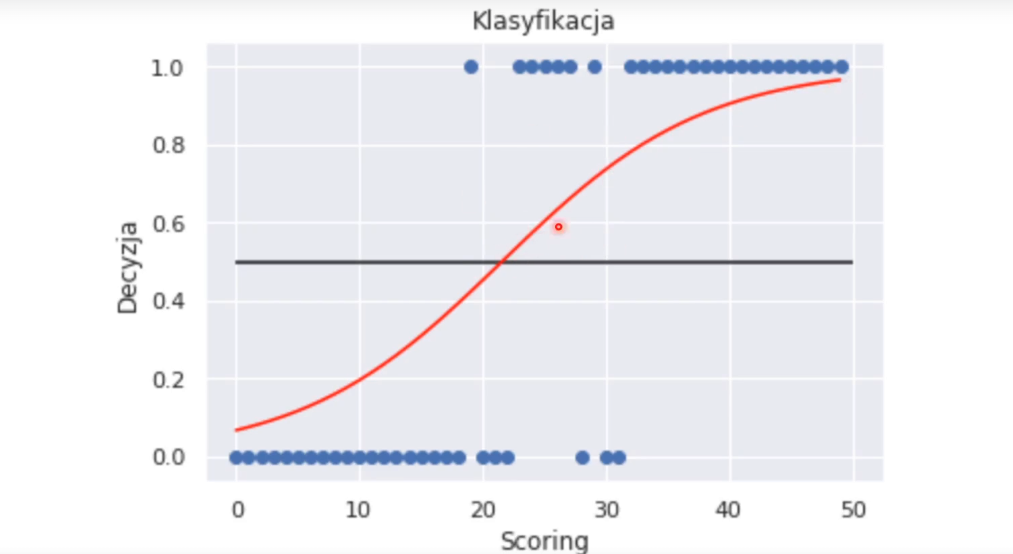

### Zadania 21-30

### Przykład praktyczny

### Kod:

In [34]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [36]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'rozmiar data: {data.shape}')
print(f'rozmiar target: {target.shape}')

rozmiar data: (569, 30)
rozmiar target: (569,)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=20)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [38]:
all_data = np.c_[data, target]
df = pd.DataFrame(
    data=all_data,
    columns=list(raw_data['feature_names']) + ['target'],
)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [40]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler().fit(X_train)

In [43]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [45]:
X_test.shape

(143, 30)

In [46]:
y_pred = log_reg.predict(X_test)

### Ocena jakości modelu

In [47]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [48]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

Accuracy: 0.986013986013986


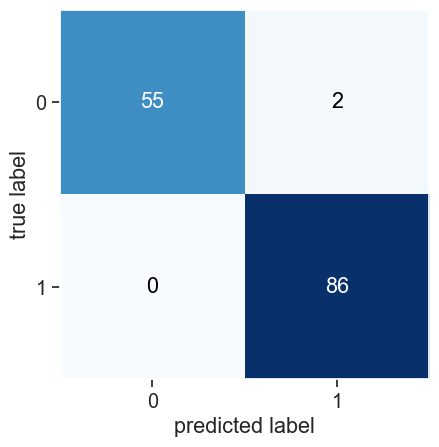

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')